In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [11]:
df.shape

(1470, 35)

In [12]:
df.duplicated().sum()

np.int64(0)

## **Checking for cardinality columns**

In [13]:
df.nunique().sort_values(ascending=False)

,0
EmployeeNumber,1470
MonthlyRate,1427
MonthlyIncome,1349
DailyRate,886
HourlyRate,71
Age,43
TotalWorkingYears,40
YearsAtCompany,37
DistanceFromHome,29
YearsInCurrentRole,19


In [14]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [15]:
categorical = df.select_dtypes(include='object').columns

In [16]:
numerical = df.select_dtypes(exclude='object').columns

In [17]:
for col in categorical:

    print(df[col].value_counts())
    print('-' * 40)


Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------------------------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Rese

## **Checking for outliers**

In [18]:

outlier_summary = {}

for col in numerical:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary


{'Age': 0,
 'DailyRate': 0,
 'DistanceFromHome': 0,
 'Education': 0,
 'EmployeeNumber': 0,
 'EnvironmentSatisfaction': 0,
 'HourlyRate': 0,
 'JobInvolvement': 0,
 'JobLevel': 0,
 'JobSatisfaction': 0,
 'MonthlyIncome': 114,
 'MonthlyRate': 0,
 'NumCompaniesWorked': 52,
 'PercentSalaryHike': 0,
 'PerformanceRating': 226,
 'RelationshipSatisfaction': 0,
 'StockOptionLevel': 85,
 'TotalWorkingYears': 63,
 'TrainingTimesLastYear': 238,
 'WorkLifeBalance': 0,
 'YearsAtCompany': 104,
 'YearsInCurrentRole': 21,
 'YearsSinceLastPromotion': 107,
 'YearsWithCurrManager': 14}

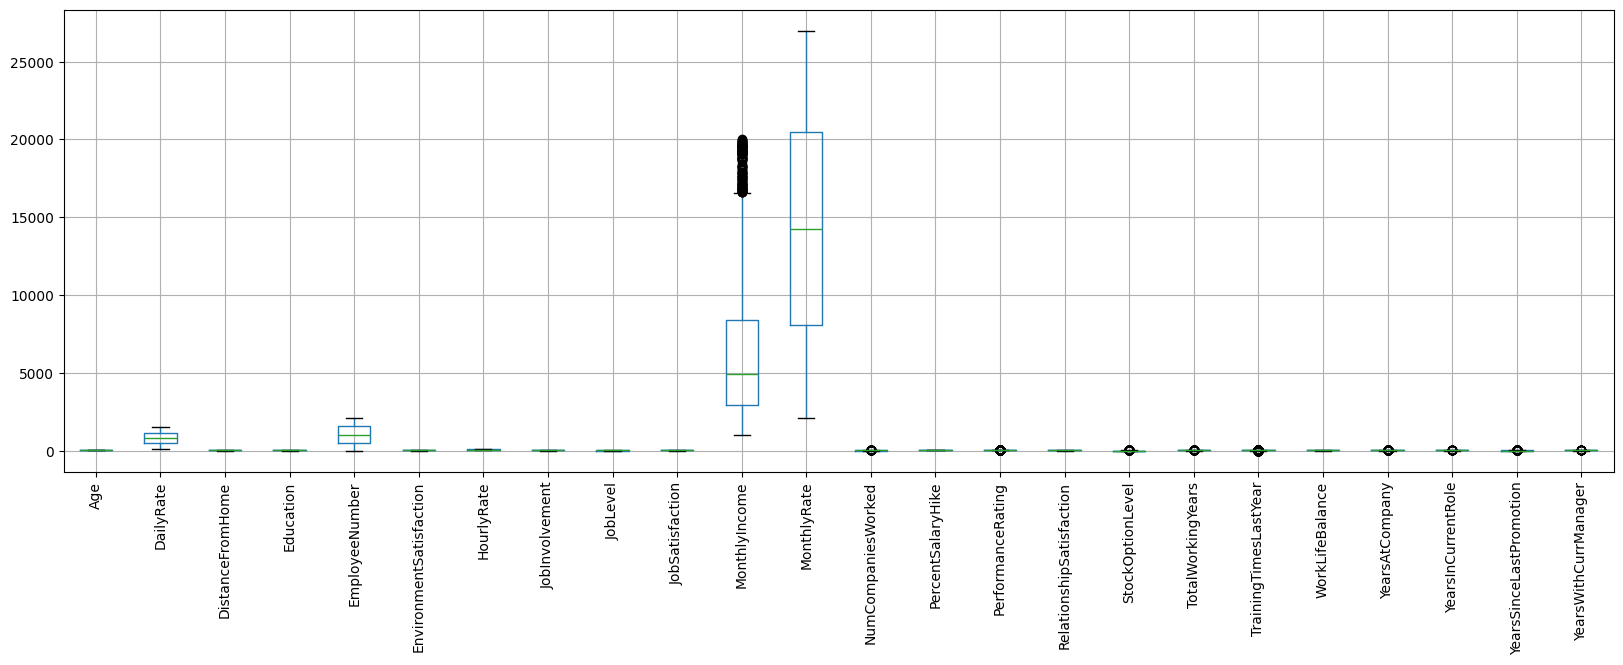

In [19]:
df[numerical].boxplot(figsize=(20,6))
plt.xticks(rotation=90)
plt.show()

In [20]:
# Years at company should not exceed total working years

df[df['YearsAtCompany'] > df['TotalWorkingYears']]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [21]:
# Years in current role should not exceed years at company
df[df['YearsInCurrentRole']>df['YearsAtCompany']]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [22]:
df['Attrition'].value_counts(normalize=True) * 100

,proportion
Attrition,
No,83.877551
Yes,16.122449


## **Export clean Data**

In [23]:
df.to_csv('HR_Attrition_Cleaned.csv', index=False)